In [13]:
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

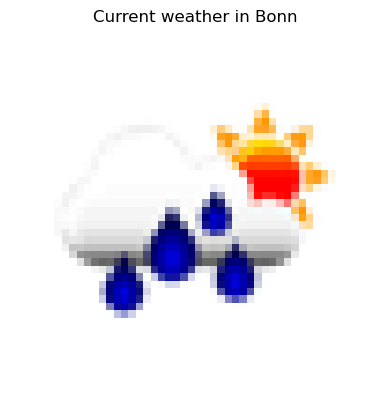

light rain with a temperature of 20.03°C (feels like 19.79°C), wind W at 7.72 m/s, humidity 65%.


In [19]:
#plot graph outputting the current weather of bonn using opeanweathermap api 
import requests

def get_weather_data(api_key, city):
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    params = {
        "q": city,
        "appid": api_key,
        "units": "metric"  # You can change units to "imperial" for Fahrenheit.
    }
    response = requests.get(base_url, params=params)
    data = response.json()
    return data

def plot_weather_data(weather_data):
    # Extract relevant data from the weather_data dictionary.
    city = weather_data["name"]
    temperature = weather_data["main"]["temp"]
    feels_like = weather_data["main"]["feels_like"]
    humidity = weather_data["main"]["humidity"]
    wind_speed = weather_data["wind"]["speed"]
    wind_direction = weather_data["wind"]["deg"]
    weather_description = weather_data["weather"][0]["description"]
    weather_icon = weather_data["weather"][0]["icon"]
    # Convert wind direction from degrees to a string.
    if wind_direction < 45 or wind_direction > 315:
        wind_direction = "N"
    elif 45 <= wind_direction < 135:
        wind_direction = "E"
    elif 135 <= wind_direction < 225:
        wind_direction = "S"
    else:
        wind_direction = "W"
    # Create a string summarizing the weather.
    summary = f"{weather_description} with a temperature of {temperature}°C (feels like {feels_like}°C), wind {wind_direction} at {wind_speed} m/s, humidity {humidity}%."
    # Plot the weather icon.
    icon_url = f"http://openweathermap.org/img/w/{weather_icon}.png"
    icon_data = requests.get(icon_url).content
    with open("icon.png", "wb") as f:
        f.write(icon_data)
    icon = plt.imread("icon.png")
    plt.imshow(icon)
    plt.axis("off")
    plt.title(f"Current weather in {city}")
    plt.show()
    # Print the summary.
    print(summary)
    # give prediction for the next 5 hours
    # Extract the hourly forecast data.
    
    

if __name__ == "__main__":
    api_key = "f4766afce71a842adab3a4955f9270c3"  # Replace this with your actual API key.
    city = "Bonn"
    weather_data = get_weather_data(api_key, city)
    plot_weather_data(weather_data)

hello world
